In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
df_train = pd.read_csv('train.csv',index_col='id')
df_test = pd.read_csv('test.csv',index_col='id')

# EXPLORING THE DATA

In [90]:
df_train.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f12,f13,f14,f15,f16,f17,f18,f19,f20,target
id,,,,,,,,,,,,,,,,,,,,,
1,0.813120,-0.317922,0.027886,2.966993,1.792626,1.639461,1.038417,-1.265553,2.737895,3.723351,...,2.074784,-0.549459,0.588724,0.670610,0.102525,1.963463,-0.349565,-0.294764,-0.206112,-18.759727
2,1.187370,0.574752,0.480094,1.003127,1.743455,1.653923,0.289389,1.758154,1.447072,0.014709,...,0.904899,0.936627,0.692230,0.631463,1.022266,2.211432,-0.318560,0.696366,0.693999,8.082223
3,0.713207,-0.061996,0.423746,0.111901,1.763365,1.651579,1.026891,1.283781,1.116797,0.291573,...,1.581493,1.151487,0.213017,0.766878,1.003003,1.824628,1.248738,NaN,0.600792,2.961315
4,0.779316,0.687488,0.388627,1.343889,1.743500,1.641686,-0.670589,0.135970,1.553194,2.046264,...,1.995739,0.650913,0.925546,0.657044,0.558577,1.915205,2.763816,1.665433,0.397841,-0.710178
5,0.674119,-0.286842,0.386524,2.416830,1.787492,1.636464,1.782221,0.722959,2.030776,0.550102,...,0.485689,-1.000375,0.970572,0.900548,0.638401,1.893995,-2.186096,1.838846,1.070571,5.328069


<Axes: xlabel='id'>

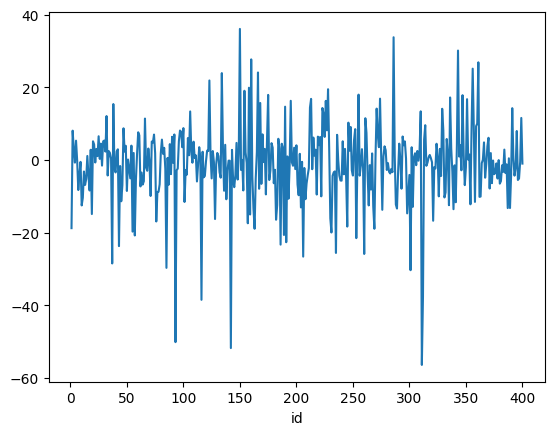

In [91]:
df_train['target'].plot()


*Notes:*

Need something that can deal with outliers as the above graph shows

Additionally we will need a imputer to deal with outliers

In [92]:
df_train.isna().sum() #!only minor  74 total but only 400 examples so cant just get rid of them, imputer?

f1        5
f2        2
f3        3
f4        3
f5        7
f6        2
f7        4
f8        3
f9        3
f10       5
f11       3
f12       3
f13       6
f14       5
f15       0
f16       5
f17       4
f18       2
f19       3
f20       6
target    0
dtype: int64

In [93]:
# THE FOLLOWING CODE WAS GENERATED WITH THE HELP OF CHATGPT, THE PROMPTS ARE BELOW AND THIS WAS DONE SO THAT I CAN QUICKLY SEE THIS INFORMATION
# AS I WANTED TO SEE HOW THE DATA BEHAVED AND WHETHER I WOULD NEED TO SCALE THE DATA

#prompt: 
'''
write me some python code that takes in a pandas dataframe and for each column in the dataframe,
makes a graph with the max, min, average, and variance for that column

can you make it so it displays all this info on one graph
'''
#Creates one grouped bar chart displaying max, min, mean, and variance for each numeric column in the DataFrame.
def plot_all_column_statistics(df):
    numeric_cols = df.select_dtypes(include='number').columns
    stats = { # Collect statistics
        "Max": [],
        "Min": [],
        "Mean": [],
        "Variance": []}
    for col in numeric_cols:
        series = df[col].dropna()
        stats["Max"].append(series.max())
        stats["Min"].append(series.min())
        stats["Mean"].append(series.mean())
        stats["Variance"].append(series.var())
    # Plotting
    x = np.arange(len(numeric_cols))  # column positions
    width = 0.2  # bar width

    plt.figure(figsize=(12, 6))
    plt.bar(x - 1.5*width, stats["Max"], width, label="Max")
    plt.bar(x - 0.5*width, stats["Min"], width, label="Min")
    plt.bar(x + 0.5*width, stats["Mean"], width, label="Mean")
    plt.bar(x + 1.5*width, stats["Variance"], width, label="Variance")

    plt.xticks(x, numeric_cols)
    plt.ylabel("Value")
    plt.title("Column Statistics (Max, Min, Mean, Variance)")
    plt.legend()
    plt.tight_layout()
    plt.show()

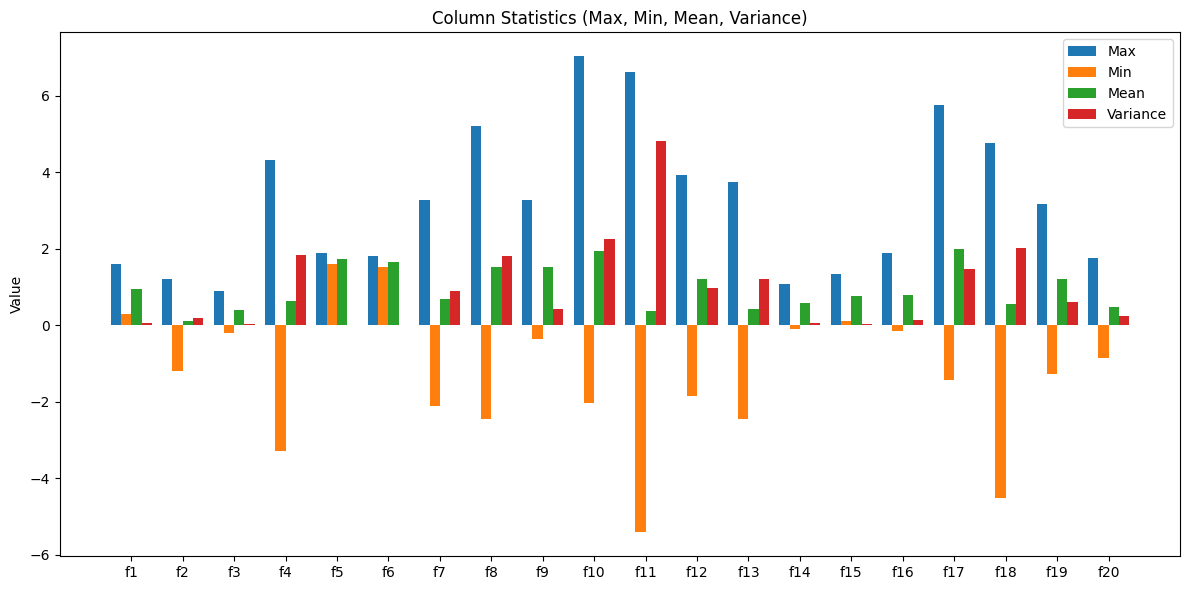

In [94]:
df_testing = df_train.drop('target',axis=1)
plot_all_column_statistics(df_testing)

*Notes:*

The above graph again shows that the data seems to be mostly on the same scale but with some of these extreme max and mins, scaling the data would be helpful

In [95]:
X_train = df_train.drop('target',axis=1) #spliting the data 
y_train = df_train['target']

# DATA PREPROCESSOR
This will be a preprocessor used through all of the models.

As such its not going to do anything fancy, just impute and scale the data, for more fancy stuff like using PCA, thatll be defined at that specifc model.

Both of these preprocessors are needed for reasons that are shown above

In [96]:
cols = ['f1','f2','f3','f4','f5','f6','f7','f8','f9','f10','f11','f12','f13','f14','f15','f16','f17','f18','f19','f20',]

from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import make_column_selector as selector

feature_processor=Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')), 
    ('scaler',StandardScaler())
    ])

processor = ColumnTransformer(transformers = [('processor',feature_processor,cols)],remainder='passthrough' )
processor

,transformers,"[('processor', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


# SOME FUNCTION DEFS FOR CONVIENCE

In [97]:
from sklearn.metrics import mean_squared_error
#======
#This funciton splits the data into training and validation sets and plots the performance of the mode 
#======
def make_train_vs_test_curves(model,X_train,y_train):
    train_size_abs, train_scores, test_scores = learning_curve(
        model, X_train, y_train, train_sizes=[0.3, 0.6, 0.9]
    )
    plt.plot(train_scores.flatten(),color='red')
    plt.plot(test_scores.flatten(),color='blue')
#=====
#This function shows the orginal target data on top of the predicted data based on the trained model, while also outputing the square root of the MSE score.
#=====
def training_data_fit_display(model,X_train,y_train):
    x_train_pred = model.predict(X_train)
    print("Here is the MSE score:")
    print(np.sqrt(mean_squared_error(y_train,x_train_pred)))
    plt.plot(x_train_pred)
    plt.plot(y_train,color='red')

time_taken_to_train = []
time_taken_to_predict = []

# General method of training these models:

Because the training set is, relativly small, I decide to not explictly seperate out a testing set from the avaible training data, instead, my general method was to us GridSearchCV to search for hyperparamters and only after finding these params, performing train test spliting to train and then validate the model on the testing set, doing this several times. (this was achieved with the make_train_vs_test_curves function defined above).

Additionally beacuse I wanted to avoid overfitting, I began without using polynomial features for each model, only adding them after if I decided they had performed well enough to continue onwards.

My process for choosing the best models was based on the Kaggle submission score. I knew that overfitting could be a problem so all models i submited to kaggle at least once (even if they didnt have the best scores from my metrics, this was because something could have had a good train MSE score, but being overfit it does bad on the testing data, were as something without the best scores could still have done well in the testing data). Then based on those scores i either dropped the model, or tried to continue and refine it. (This can be seen with the ridge and lasso regression models, which performed ok with my metrics, but did the best in kaggle, so i made more versions/iterations of them till they got better)

Finally to avoid confusion I trained models 1-8 in that order, after seeing there performance on kaggle and on my metrics, i then choose Rideg and Lasso to do further iteraions on with models the the .2 versions and etc

# MODEL 1: REGRESSION
No regularization and no polynomial features, so nothing to grid search

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('model',LinearRegression())
])

import time

start = time.perf_counter()
test_pipeline.fit(X_train,y_train.to_numpy())
end = time.perf_counter()
time_taken_to_train.append(end-start)

start = time.perf_counter()
test_pipeline.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)

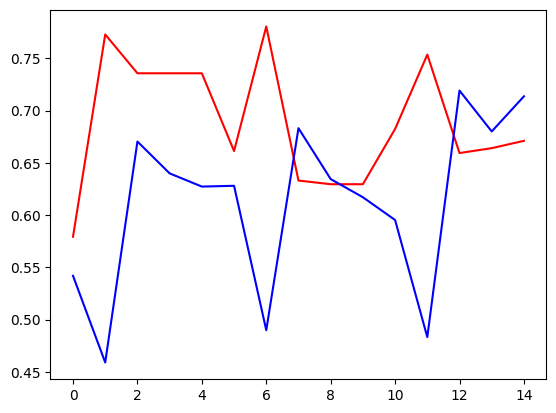

In [99]:
make_train_vs_test_curves(test_pipeline,X_train,y_train)

Here is the MSE score:
6.213200464581835


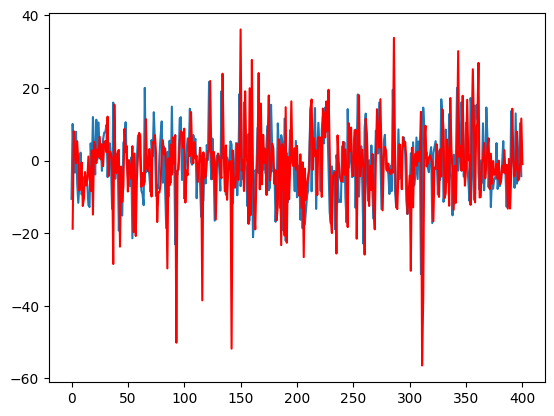

In [100]:
training_data_fit_display(test_pipeline,X_train,y_train)

*Summary:*

The model performs ok, the MSE score isnt the best, and more importantly the testing score in the validation doesnt perform the best

# MODEL 2: SVM 

Just SVM, nothing on top of it

In [101]:
from sklearn.svm import SVR

test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('model',SVR())
])

params_dict = {
    "model__C":np.linspace(1,10,30),
    "model__epsilon":np.linspace(.01,1,20) #the two SVM metrics
}
grid = GridSearchCV(test_pipeline,
                    params_dict,
                    cv = 10,
                    scoring = 'neg_mean_squared_error',
                    verbose = 1, 
                    n_jobs = -1 
                    )

grid.fit(X_train,y_train)


Fitting 10 folds for each of 600 candidates, totalling 6000 fits


,estimator,"Pipeline(step...del', SVR())])"
,param_grid,"{'model__C': array([ 1. ... 10. ]), 'model__epsilon': array([0.01 ..., 1. ])}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,10
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,steps,"[('imputer', ...), ('scaler', ...)]"


In [102]:
grid.best_params_
start = time.perf_counter()
grid.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)

Here is the MSE score:
5.252533495200473


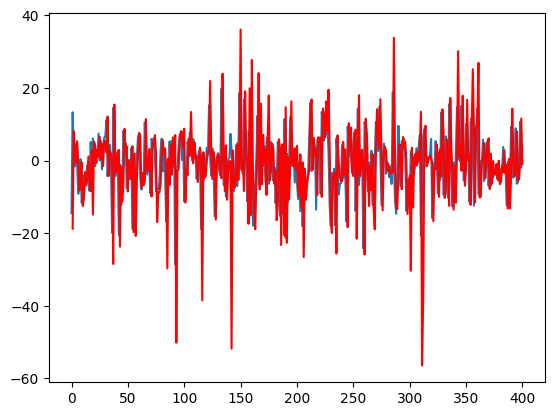

In [103]:
training_data_fit_display(grid,X_train,y_train)

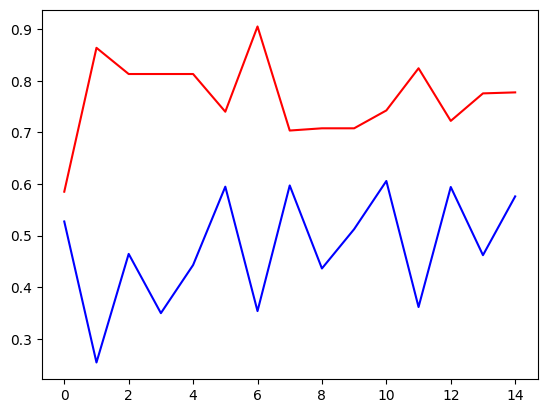

In [104]:
best_svm = grid.best_estimator_
make_train_vs_test_curves(best_svm,X_train,y_train)

start = time.perf_counter()
best_svm.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)

*Summary:*

This model performs quite well, with a consistantly higher testing score over training in validation, along with a good MSE.

However, when submited to Kaggle the model didnt perform as well as I hoped. I believe that it was either overfitting or a lack of model complexity.

# MODEL 3: RANDOM FOREST REGRESSION

In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('model',RandomForestRegressor())
])


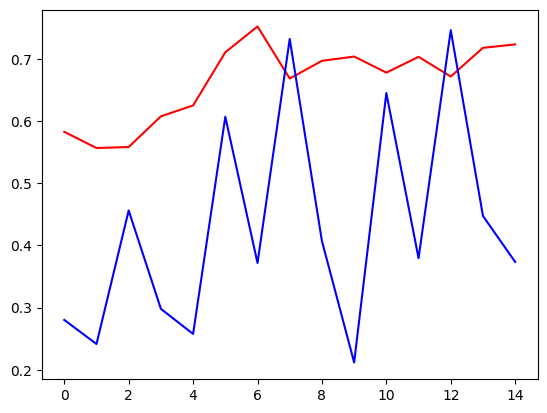

In [107]:

from sklearn.model_selection import RandomizedSearchCV

param_dic = {
    'model__n_estimators': range(20,250),
    'model__max_depth': range(2,10),
    'model__min_samples_split': range(10,250), #the metrics used for random forest reg
    'model__min_samples_leaf': range(5,250)
}
grid = RandomizedSearchCV(test_pipeline,
                          param_dic,
                          n_iter=50,
                          scoring='neg_mean_squared_error',
                          n_jobs=-1,
                          cv=5
)
grid.fit(X_train,y_train)
best_random_forest_reg = grid.best_estimator_
make_train_vs_test_curves(best_random_forest_reg,X_train,y_train)

Here is the MSE score:
6.06620035143386


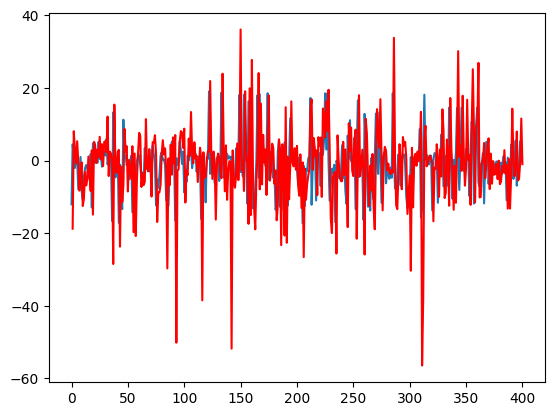

In [108]:
training_data_fit_display(best_random_forest_reg,X_train,y_train)
start = time.perf_counter()
best_random_forest_reg.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)


start = time.perf_counter()
best_random_forest_reg.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)

*Summary:*

This model didnt do quite well, the MSE score was bad, the train test validation returned poor results and most importantly submiting to kaggle returned absymal results, so im going to drop pursing this model.

# MODEL 4: RIDGE REGRESSION WITH POLYNOMIAL FEATURES

Fitting 10 folds for each of 50 candidates, totalling 500 fits


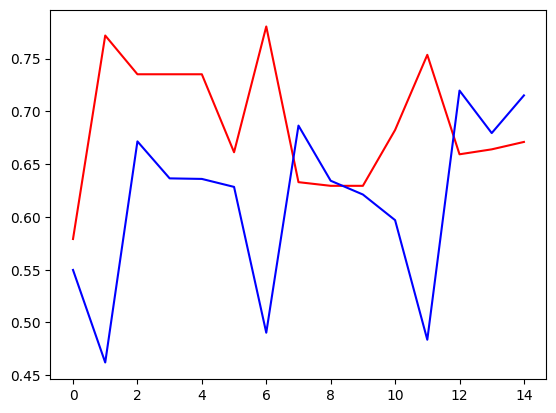

In [109]:
from sklearn.linear_model import Ridge

test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('model',Ridge())
])

params_dict = {
    "model__alpha":np.linspace(0,1,50),
}
grid = GridSearchCV(test_pipeline,
                    params_dict,
                    cv = 10,
                    scoring = 'neg_mean_absolute_error',
                    verbose = 1, 
                    n_jobs = -1 
                    )
grid.fit(X_train,y_train)
best_ridge = grid.best_estimator_
make_train_vs_test_curves(best_ridge,X_train,y_train)

Here is the MSE score:
6.213283783436817


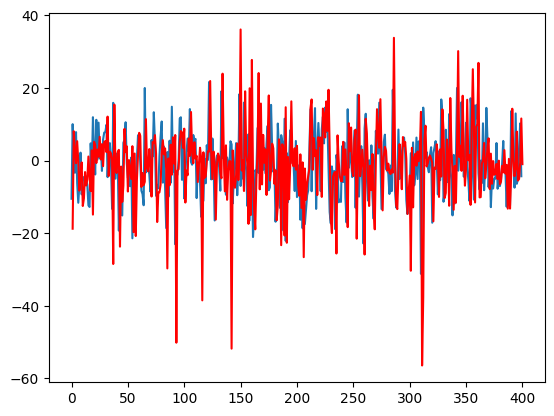

In [110]:
training_data_fit_display(best_ridge,X_train,y_train)
start = time.perf_counter()
best_ridge.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)


start = time.perf_counter()
best_ridge.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)

*Summary:*

This model, while intially not seeming to perform as well as SVM in MSE, and train test validation, it seems this model was much better at generalizing, because submitting it to kaggle produced quite good results, as such, a second round of training was performed in a attempt to better nail done the ideal params

# MODEL 4.2 MORE TRAINING

Same setup as above, but more time was taken to train, with a wider range of values. I also manuelly narrowed the range of params over repeated iterations based on what the grid search would converge to so that i could get even better values

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


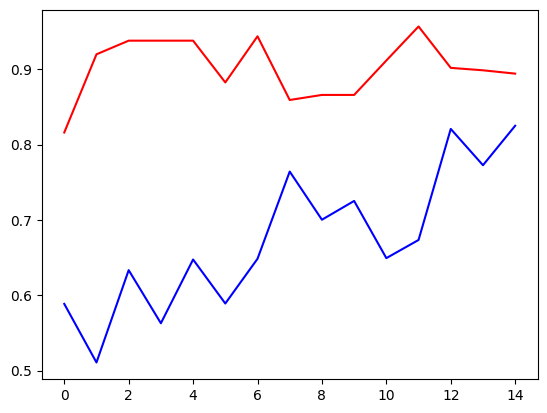

In [111]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('poly',PolynomialFeatures()),
    ('model',Ridge())
])

params_dict = {
    "model__alpha":np.linspace(1100,1200,500),  #within this range is what i eventually settled on as being ideal
    "poly__degree":[3]
}
grid = GridSearchCV(test_pipeline,
                    params_dict,
                    cv = 10,
                    scoring = 'neg_mean_absolute_error',
                    verbose = 1, 
                    n_jobs = -1 
                    )

grid.fit(X_train,y_train)
best_ridge_2 = grid.best_estimator_

start = time.perf_counter()
best_ridge_2.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)


start = time.perf_counter()
grid.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)


make_train_vs_test_curves(best_ridge_2,X_train,y_train)

Here is the MSE score:
3.151414116911473


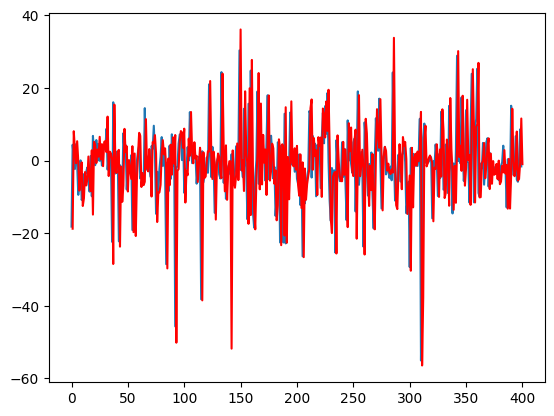

In [112]:
training_data_fit_display(best_ridge_2,X_train,y_train)

In [113]:
grid.best_params_ #these are the params that eventualy was settled on

{'model__alpha': np.float64(1154.308617234469), 'poly__degree': 3}

*Summary:*

The performance here was great, not only were my metrics improved (mainly the train test validation) but the kaggle performance improved as well, so in a attempt to gain better performance, because i seem to have made the params as ideal as i can, im going to try using PCA.

# MODEL 4.3 SAME AS ABOVE BUT THIS TIME WITH PCA 

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


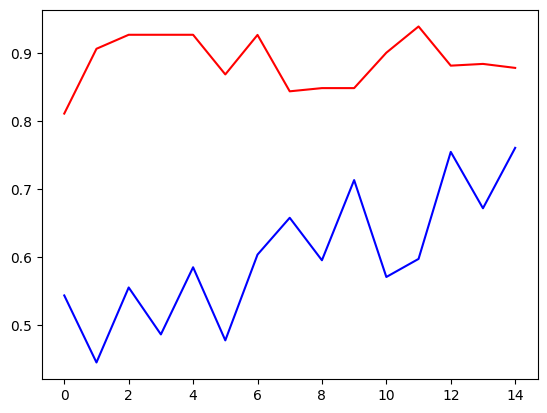

In [114]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('pca',PCA()),
    ('poly',PolynomialFeatures()),
    ('model',Ridge())
])

params_dict = {
    "model__alpha":np.linspace(1300,1400,500), 
    "poly__degree":[3],
    "pca__n_components":[17] #these are only after several training goes which seemed to have the grid search converging towards these values 
}
grid = GridSearchCV(test_pipeline,
                    params_dict,
                    cv = 10,
                    scoring = 'neg_mean_absolute_error',
                    verbose = 1, 
                    n_jobs = -1 
                    )
grid.fit(X_train,y_train)
best_ridge_3 = grid.best_estimator_

start = time.perf_counter()
best_ridge_3.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)


start = time.perf_counter()
grid.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)


make_train_vs_test_curves(best_ridge_3,X_train,y_train)

Here is the MSE score:
3.472270916747489


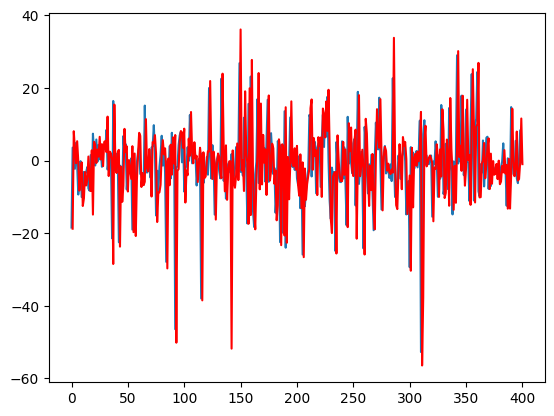

In [115]:
training_data_fit_display(best_ridge_3,X_train,y_train)

In [116]:
grid.best_params_ #best values

{'model__alpha': np.float64(1306.8136272545091),
 'pca__n_components': 17,
 'poly__degree': 3}

*Summary:*

The performance of this model was NOT improved by PCA, it seems that all the dimensions of the data contribute, because even the reduction of 3 dims hurt quite badly the performance of the model, as such im going to not use PCA at all from here on out.

# MODEL 5 DECISION TREE REGRESSION

Fitting 10 folds for each of 8464 candidates, totalling 84640 fits


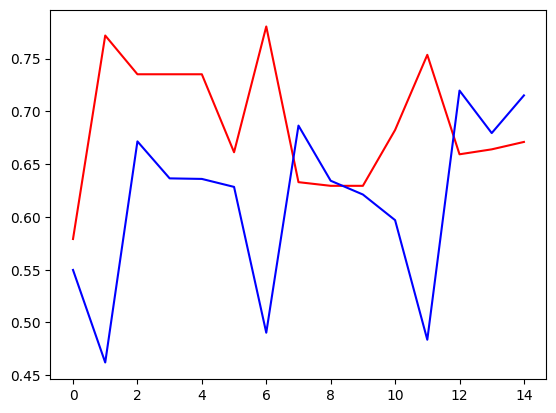

In [117]:
from sklearn.tree import DecisionTreeRegressor

test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('model',DecisionTreeRegressor())
])

params_dict={
    'model__max_depth':range(1,5),
    'model__min_samples_split':range(5,50,2),
    'model__min_samples_leaf':range(5,50,2),
    'model__max_leaf_nodes':[None,3,5,10],
}
grid = GridSearchCV(test_pipeline,
                    params_dict,
                    cv = 10,
                    scoring = 'neg_mean_absolute_error',
                    verbose = 1, 
                    n_jobs = -1 
                    )
grid.fit(X_train,y_train)
best_tree = grid.best_estimator_
make_train_vs_test_curves(best_ridge,X_train,y_train)

Here is the MSE score:
7.4110216300609


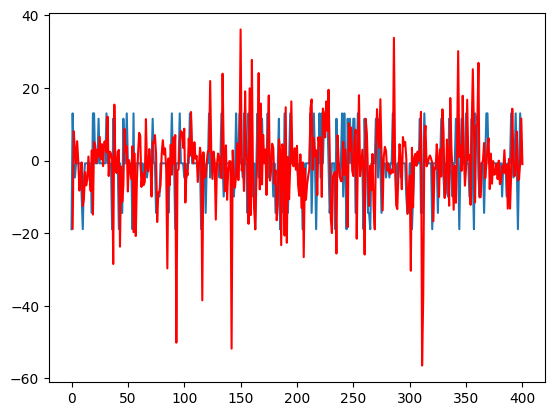

In [118]:
training_data_fit_display(best_tree,X_train,y_train)
start = time.perf_counter()
best_tree.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)

start = time.perf_counter()
best_tree.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)

*Summary:*

This model performed at the end of the day quite bad, compared to other models. This makes sense though, if a random forest performed poorly, then a regular decision tree is also more then likely to perform pooerly as well.

# MODEL 6 LASSO

Without polynomial features

Fitting 10 folds for each of 150 candidates, totalling 1500 fits


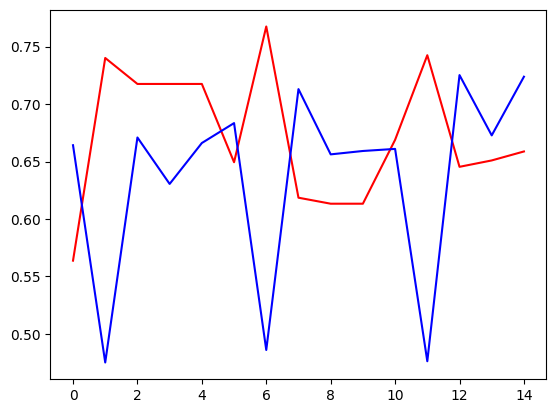

In [119]:
from sklearn.linear_model import Lasso

test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('model',Lasso())
])

params_dict = {
    "model__alpha":np.linspace(0.001,1,75),
    "model__fit_intercept":[False,True]
}
grid = GridSearchCV(test_pipeline,
                    params_dict,
                    cv = 10,
                    scoring = 'neg_mean_absolute_error',
                     verbose = 1, 
                    n_jobs = -1 
                    )
grid.fit(X_train,y_train)
best_lasso = grid.best_estimator_
make_train_vs_test_curves(best_lasso,X_train,y_train)

Here is the MSE score:
6.330678391528587


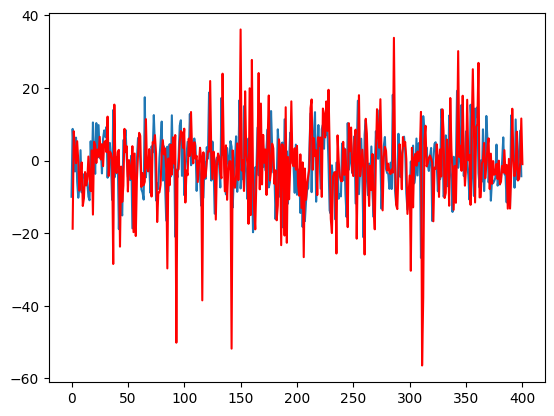

In [120]:
training_data_fit_display(best_lasso,X_train,y_train)
start = time.perf_counter()
best_lasso.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)


start = time.perf_counter()
best_lasso.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)




*Summary:* 

This model performed surprising well. While the metrics i tested it on (seen above) didnt show AMAZING performance, the kaggle score was the best that i had gotten up to this point, so i continued to follow done this model type.

# MODEL 6.2 MORE TRAINING ON THE LASSO

This time with polynomial features

As I did on Model 4.2 (ridge reg with polynomial features) i manuelly narrowed the range of params that i used based on what the model was converging towards to get better results

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


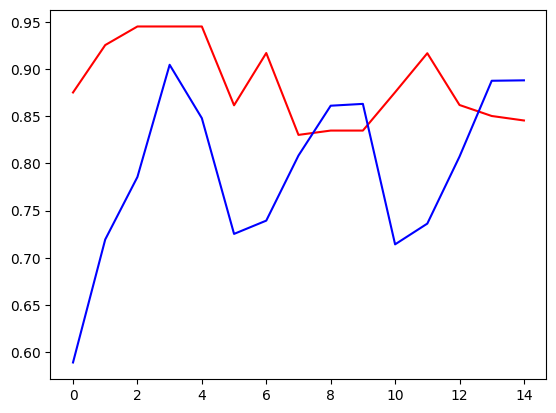

In [121]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA

test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('poly',PolynomialFeatures()),
    ('model',Lasso())
])

params_dict = {
    "model__alpha":np.linspace(.25,.75,100), 
    "poly__degree":[3,4],
    "model__max_iter":[5000]
}
grid = GridSearchCV(test_pipeline,
                    params_dict,
                    cv = 10,
                    scoring = 'neg_mean_absolute_error',
                    verbose = 1, 
                    n_jobs = -1 
                    )

grid.fit(X_train,y_train)
best_lasso_2 = grid.best_estimator_


start = time.perf_counter()
best_lasso_2.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)


start = time.perf_counter()
grid.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)



make_train_vs_test_curves(best_lasso_2,X_train,y_train)

Here is the MSE score:
4.044953021119381


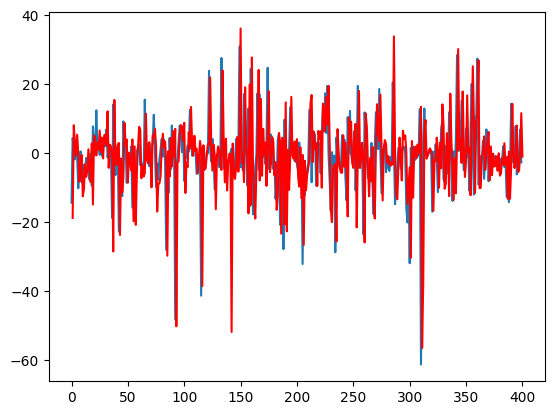

In [122]:
training_data_fit_display(best_lasso_2,X_train,y_train)

In [123]:
grid.best_params_ #final best params

{'model__alpha': np.float64(0.5025252525252526),
 'model__max_iter': 5000,
 'poly__degree': 3}

*Summary:*

This was the best model that I could find, performing miles better then any other model in Kaggle along with the train test validation scores, as such this is my final best Model.

# MODEL 7 ELASTIC NET

Without polynomial features

Fitting 10 folds for each of 11250 candidates, totalling 112500 fits


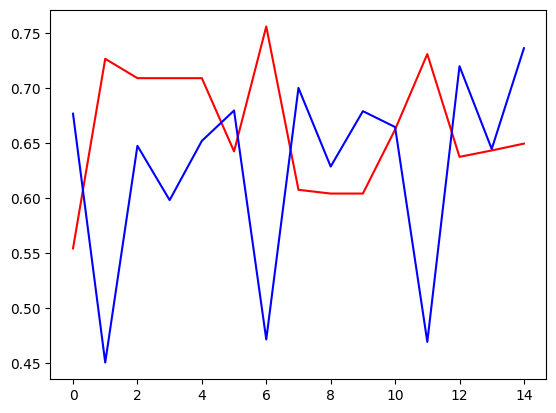

In [124]:
from sklearn.linear_model import ElasticNet
test_pipeline = Pipeline(steps=[
    ('processor',feature_processor),
    ('model',ElasticNet())
])

params_dict = {
    "model__alpha":np.linspace(.02,1,75),
    "model__l1_ratio":np.linspace(.02,1,75),
    "model__fit_intercept":[False,True]
}
grid = GridSearchCV(test_pipeline,
                    params_dict,
                    cv = 10,
                    scoring = 'neg_mean_absolute_error', 
                    verbose = 1, 
                    n_jobs = -1 
                    )

grid.fit(X_train,y_train)
best_elastic = grid.best_estimator_

start = time.perf_counter()
best_elastic.fit(X_train,y_train)
end = time.perf_counter()
time_taken_to_train.append(end-start)


start = time.perf_counter()
grid.predict(X_train)
end = time.perf_counter()
time_taken_to_predict.append(end-start)


make_train_vs_test_curves(best_elastic,X_train,y_train)

Here is the MSE score:
6.411331395949554


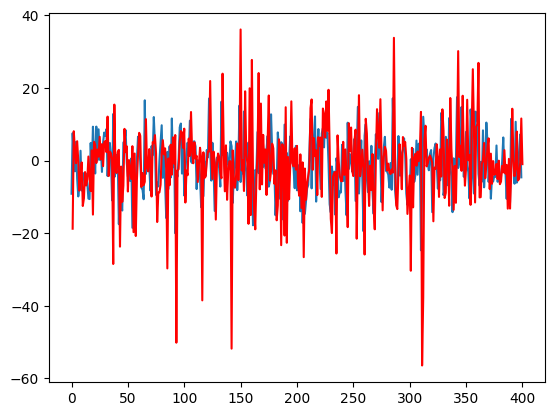

In [125]:
training_data_fit_display(best_elastic,X_train,y_train)

*Summary:*

After the performance of the ridge and lasso i figured testing both combined would be ideal, however it didnt pruduce the best results, being out performed but both ridge and lasso regresssion individually, so i abandoned this route for following ridge and lasso by themselves

# MODEL 8 NN

This one i manuelly narrowed the range of how many layers to use based on kaggle performance. I didnt have high hopes for this model type, and it didnt perform saddly.

In [126]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from numpy.random import seed
import tensorflow
tensorflow.random.set_seed(42)

y_train_np = feature_processor.fit_transform(pd.DataFrame(y_train))
X_train_np = feature_processor.fit_transform(X_train)


In [127]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(10, activation='relu', input_shape=(20,)),
    layers.Dense(1) # Output layer for regression
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(X_train_np, y_train_np, epochs=100, batch_size=32, validation_split=0.2)



Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4544 - mae: 0.9397 - val_loss: 1.5314 - val_mae: 0.9449
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3135 - mae: 0.8829 - val_loss: 1.3798 - val_mae: 0.8986
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1979 - mae: 0.8329 - val_loss: 1.2512 - val_mae: 0.8558
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1007 - mae: 0.7901 - val_loss: 1.1422 - val_mae: 0.8169
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.0196 - mae: 0.7532 - val_loss: 1.0501 - val_mae: 0.7826
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9517 - mae: 0.7215 - val_loss: 0.9724 - val_mae: 0.7522
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.8944 - mae: 0.6944 - val_loss: 0.9069 - val_mae: 0.7245
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8451 - mae: 0.6703 - val_loss: 0.8500 - val_mae: 0.6989
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8022 - mae: 0.

In [128]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 665 (2.60 KB)

 Trainable params: 221 (884.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 444 (1.74 KB)

In [129]:
feature_processor=Pipeline(steps = [
    ('imputer',SimpleImputer(strategy='median')), #!MAY CHANGE THIS TO MEAN I THINK
    ('scaler',StandardScaler())
    ])
df_testing_np =feature_processor.fit_transform(df_test)
df_testing_np.shape

(800, 20)

In [130]:
nn_pred = model.predict(df_testing_np)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step


*Summary:*

Submission to kaggle showed that this model performed the WORST. Quite disappointing but oh well, and that was after manuelly decreasing the number of layers it still performed the worst in kaggle. Oh well, im going to drop this model then.

Also i know i didnt display any of the model performance metrics, but thats because i didnt want to adapt my code to tensorflow code, and because it performed so bad in kaggle that its not even worth it.

# QUICK INTERLUDE: PREDICTION AND TRAINING TIME

Text(0.5, 1.0, 'Prediction time vs Model')

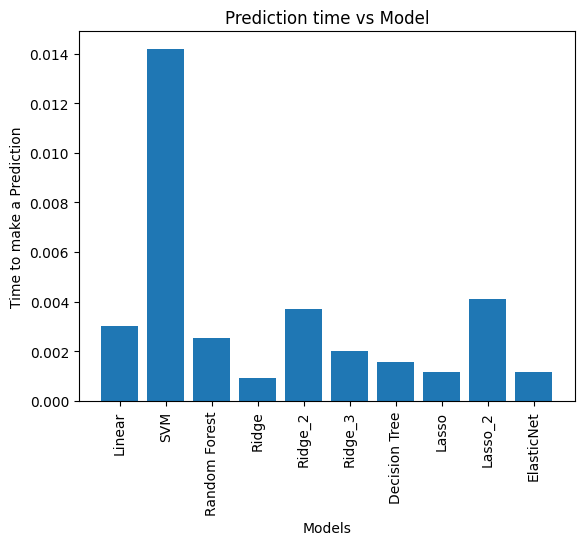

In [131]:
model_names = ['Linear','SVM','Random Forest','Ridge','Ridge_2','Ridge_3','Decision Tree','Lasso','Lasso_2','ElasticNet']
plt.bar(model_names,time_taken_to_predict)
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Time to make a Prediction')
plt.title('Prediction time vs Model')


Text(0.5, 1.0, 'Train time vs Model')

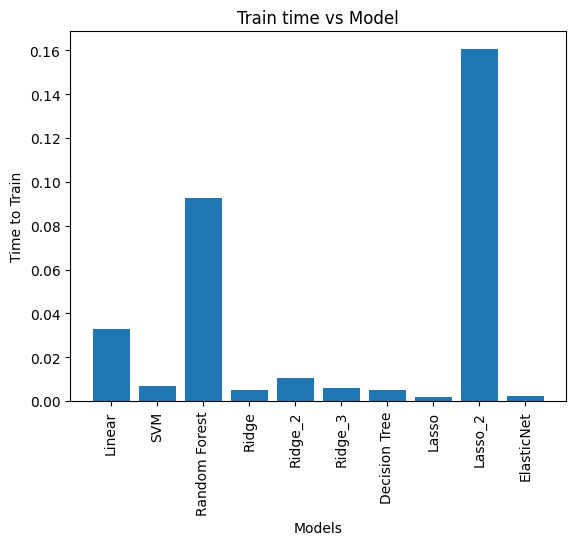

In [132]:
model_names = ['Linear','SVM','Random Forest','Ridge','Ridge_2','Ridge_3','Decision Tree','Lasso','Lasso_2','ElasticNet']
plt.bar(model_names,time_taken_to_train)
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Time to Train')
plt.title('Train time vs Model')


*Notes:*

Note that what I timed per model was explictly the training time, NOT the time taken to perform grid search.

Additional It seems that in general the more complex models take both longer to train and longer to make predicts for.

# MODEL SUBMISSIONS

In [133]:
#========
# This function takes in the mprediction and what the file should be called and outputs it to a txt for manuelly submission to kaggle
#========
def make_submission_txt(pred,filename):
    index_arr = np.arange(401, 401+pred.size).reshape(-1,1)
    index_arr = index_arr.astype(int).flatten() #makes index array
    final_array = np.stack((index_arr,pred),axis=1) #stacks them
    df = pd.DataFrame(final_array,columns=['id','target']) #adds name
    df['id'] = df['id'].astype(int) #ouputs
    df.to_csv(filename+'.csv', index=False)
    print("The file hase been created")


**SVM**

In [134]:
best_svm.fit(X_train,y_train)
best_svm_pred = best_svm.predict(df_test)
make_submission_txt(best_svm_pred,"svm1")

The file hase been created


**best_random_forest_reg**

In [135]:
best_random_forest_reg.fit(X_train,y_train)
best_random_forest_reg_pred = best_random_forest_reg.predict(df_test)
make_submission_txt(best_random_forest_reg_pred,"rfr1")

The file hase been created


**best_ridge**

In [136]:
best_ridge.fit(X_train,y_train)
best_ridge_pred = best_ridge.predict(df_test)
make_submission_txt(best_ridge_pred,"r1")
#NOTES: so far this one has performed the best when submitted

The file hase been created


**best_tree**

In [137]:
best_tree.fit(X_train,y_train)
best_tree_pred = best_tree.predict(df_test)
make_submission_txt(best_tree_pred,"t1")

The file hase been created


**best_lasso**

In [138]:
best_lasso.fit(X_train,y_train)
best_lasso_pred = best_lasso.predict(df_test)
make_submission_txt(best_lasso_pred,"lasso1")

The file hase been created


**best_elastic**

In [139]:
best_elastic.fit(X_train,y_train)
best_elastic_pred = best_elastic.predict(df_test)
make_submission_txt(best_elastic_pred,"elastic1")

The file hase been created


**best_ridge_2**

In [140]:
best_ridge_2.fit(X_train,y_train)
best_ridge_2_pred = best_ridge_2.predict(df_test)
make_submission_txt(best_ridge_2_pred,"r11")

The file hase been created


**best_ridge_3**

In [141]:
best_ridge_3.fit(X_train,y_train)
best_ridge_3_pred = best_ridge_3.predict(df_test)
make_submission_txt(best_ridge_3_pred,"r12")

The file hase been created


**best_lasso_2**

In [142]:
best_lasso_2.fit(X_train,y_train)
best_lasso_2_pred = best_lasso_2.predict(df_test)
make_submission_txt(best_lasso_2_pred,"l12")

The file hase been created


**NN**

In [143]:

make_submission_txt(nn_pred.flatten(),"nn5")

The file hase been created


# THE BEST MODELS:

A) Lasso with polynomial features: 18.58

B) Ridge with polynomial features: 32.55

C) Ridge with polynomial features and PCA: 47.92

D) Ridge (By itself): 55.22

E) Lasso (By itself): 56.93


Ranked by performance in the Kaggle submissions with the MSE score displayed (gotten from kaggles system)

Models A and B and C were able to generalize much better then the other 3, with model A, being able toe generalize the best, miles ahead of model B

And finally im going to display again how the best model performed on the metrics i tested on.

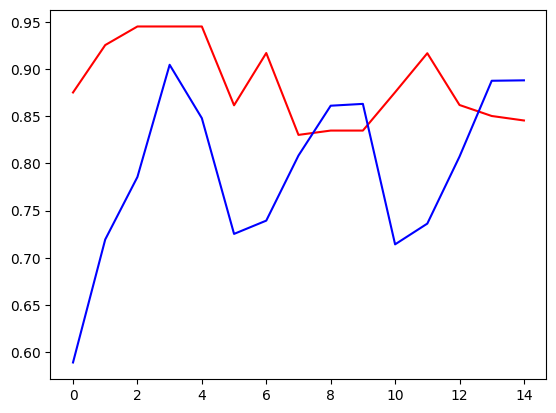

In [144]:
best_lasso_2.fit(X_train,y_train)
make_train_vs_test_curves(best_lasso_2,X_train,y_train)

Here is the MSE score:
4.044953021119381


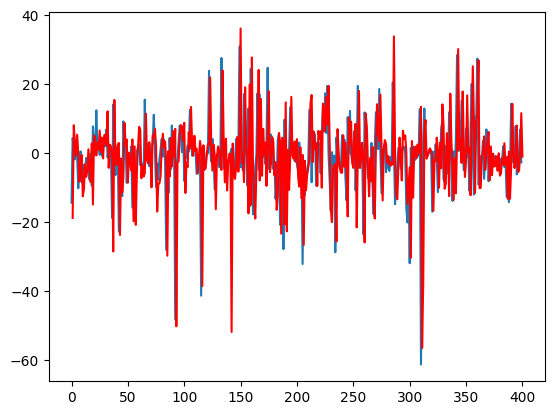

In [145]:
training_data_fit_display(best_lasso_2,X_train,y_train)

Finally this model got a kaggle score of: 18.58684
Which at least at the time of me making/submitting this assgiment had me in 1st place on the leader board for the class, which i think i kind of cool!